# Proyek Analisis Data: Bike Sharing
- **Nama:** Romario Onsu
- **Email:** romarioonsu11@gmail.com
- **ID Dicoding:** romarioonsu

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perkembangan bisnis sewa sepeda dari tahun 2011 ke tahun 2012? apakah mengalami perkembangan atau penurunan.
- Pertanyaan 2 : Pada musim apa jumlah sewa paling banyak, dan bagaimana distribusi sewa berdasarkan jenis pengguna (casual vs registered) di setiap musim?
- Pertanyaan 3 : Apakah suhu dan kecepatan angin berpengaruh terhadap jumlah sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [24]:
#Mengimport pustaka yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [5]:
import warnings

## Data Wrangling

### Gathering Data

In [6]:
#menghubungkan ke google drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
#memanggil dataset dengan melabeli dataset menjadi df_day dan df_hour

df_day = pd.read_csv("/content/gdrive/MyDrive/dataset_bikesharing/day.csv")
df_hour = pd.read_csv("/content/gdrive/MyDrive/dataset_bikesharing/hour.csv")

In [8]:
#show dataset df_day
df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [9]:
#show dataset df_hour
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

# Pada tahap ini akan melihat kedalaman data yang akan di proses

In [10]:
#mengecek data type df_day
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [11]:
#mengecek duplicate pada data df_day
print('df_day(duplicate):', df_day.duplicated().sum())

#mengecek missing value pada data df_day
print('df_day(missing value):')
print(df_day.isna().sum())

df_day(duplicate): 0
df_day(missing value):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
#mengecek data type df_hour
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [13]:
#mengecek duplicate pada data df_hour
print('df_hour(duplicate):', df_day.duplicated().sum())

#mengecek missing value pada data df_hour
print('df_hour(missing value):')
print(df_day.isna().sum())


df_hour(duplicate): 0
df_hour(missing value):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Penjelasan**


1.   Pada pengecekan data types terdapat ketidaksesuian terhadap dtday, yang seharusnya meiliki data type datetime (terdapat pada 2 dataset) maka selanjutnya harus di sesuaikan dengan mengubah ke data types date time.
2.   pada pengecekan duplicate, kedua dataset tidak memiliki duplicate.
3.   Begitupun pada pengecekan missing value kedua dataset tidak memiliki nilai yang hilang.

Oleh karena itu pada cleaning data hanaya akan dilakukan pengubahan terhadap data types saja.



In [14]:
#Saya mengubah df_day ke day dan df_hour ke hour, agar menjadi lebih efektif saat memanggil dataset
day = df_day
hour = df_hour

# Dataset day

In [15]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
# Menghitung total penyewaan per musim
data_musim = day.groupby('season')['cnt'].sum()

# Mencari musim dengan penyewaan terbanyak
musim_terbanyak = data_musim.idxmax()
total_penyewaan_terbanyak = data_musim.max()

print(f"Musim dengan penyewaan terbanyak: {musim_terbanyak} dengan total {total_penyewaan_terbanyak} penyewaan.")


Musim dengan penyewaan terbanyak: 3 dengan total 1061129 penyewaan.


In [17]:
# Membandingkan jumlah penyewaan pada working day dan holiday
penyewaan_workingday = day[day['workingday'] == 1]['cnt'].sum()
penyewaan_holiday = day[day['holiday'] == 1]['cnt'].sum()

if penyewaan_workingday > penyewaan_holiday:
  print("Jumlah penyewaan pada working day lebih banyak.")
elif penyewaan_workingday < penyewaan_holiday:
  print("Jumlah penyewaan pada holiday lebih banyak.")
else:
  print("Jumlah penyewaan pada working day dan holiday sama.")


Jumlah penyewaan pada working day lebih banyak.


# Dataset hour

In [18]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
# Menghitung total penyewaan per musim pada dataset hour
hour_musim = hour.groupby('season')['cnt'].sum()

# Mencari musim dengan penyewaan terbanyak
musim_terbanyak = hour_musim.idxmax()
total_penyewaan_terbanyak = hour_musim.max()

print(f"Musim dengan penyewaan terbanyak: {musim_terbanyak} dengan total {total_penyewaan_terbanyak} penyewaan.")

Musim dengan penyewaan terbanyak: 3 dengan total 1061129 penyewaan.


In [20]:
# Membandingkan jumlah penyewaan pada working  dan holiday pada dataset hour
penyewaan_workingday = hour[hour['workingday'] == 1]['cnt'].sum()
penyewaan_holiday = hour[hour['holiday'] == 1]['cnt'].sum()

if penyewaan_workingday > penyewaan_holiday:
  print("Jumlah penyewaan pada working day lebih banyak.")
elif penyewaan_workingday < penyewaan_holiday:
  print("Jumlah penyewaan pada holiday lebih banyak.")
else:
  print("Jumlah penyewaan pada working day dan holiday sama.")


Jumlah penyewaan pada working day lebih banyak.


# Penjelasan dataset berdasarkan analisis
Pada kedua dataset ini terdapat beberapa kolom yang menjadi suatu indikator penting terhadap penyewaan sepeda, seperti musim, bulan, waktu kerja atau liburan, temperaturem sampai kecepatan angin.
1. Dataset berisi jumlah dari 2 tahun yaitu dari 2011-2012. Yang dimana untuk 2011 di tandai dengan 0 dan 1 untuk 2012.
2. Musim dengan penyewaan sepeda terbanyak yaitu pada musim 3 ditahun 2012 dengan jumlah 1061129 penyewaan.
3. Working day lebih banyak mendapat jumlah penyewaan sepeda dibanding saat holiday.



### Cleaning Data

In [21]:
#Mengubah format date type dari dteday pada dataset day
day["dteday"] = pd.to_datetime(day["dteday"])

print('dataset day kolom "dteday" menjadi :', day["dteday"].dtypes)

dataset day kolom "dteday" menjadi : datetime64[ns]


In [22]:
#Mengubah format date type dari dteday pada dataset hour
hour["dteday"] = pd.to_datetime(hour["dteday"])

print('dataset hour kolom "dteday" menjadi :', hour["dteday"].dtypes)

dataset hour kolom "dteday" menjadi : datetime64[ns]


## Exploratory Data Analysis (EDA)

In [25]:
# Menambahkan kolom total jumlah sewa
day['total'] = day['casual'] + day['registered']
# Mengatur ukuran plot
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Jumlah Sewa Berdasarkan Musim')

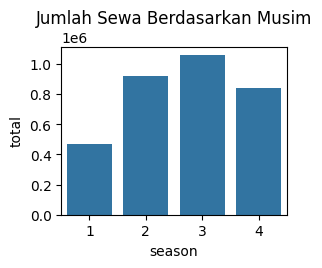

In [27]:
# Jumlah Sewa Berdasarkan Musim
plt.subplot(2, 2, 2)
season_stats = day.groupby('season')['total'].sum().reset_index()
sns.barplot(x='season', y='total', data=season_stats)
plt.title('Jumlah Sewa Berdasarkan Musim')

Text(0.5, 1.0, 'Jumlah Sewa Berdasarkan Bulan')

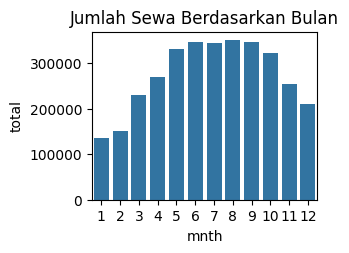

In [28]:
#  Jumlah Sewa Berdasarkan Bulan
plt.subplot(2, 2, 3)
month_stats = day.groupby('mnth')['total'].sum().reset_index()
sns.barplot(x='mnth', y='total', data=month_stats)
plt.title('Jumlah Sewa Berdasarkan Bulan')

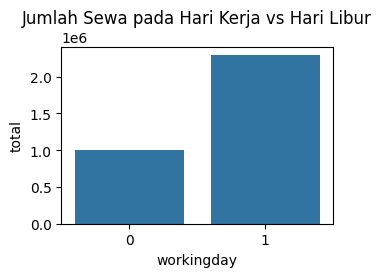

In [29]:
#Jumlah Sewa Berdasarkan Hari Kerja dan Libur
plt.subplot(2, 2, 4)
workingday_stats = day.groupby('workingday')['total'].sum().reset_index()
sns.barplot(x='workingday', y='total', data=workingday_stats)
plt.title('Jumlah Sewa pada Hari Kerja vs Hari Libur')

plt.tight_layout()
plt.show()

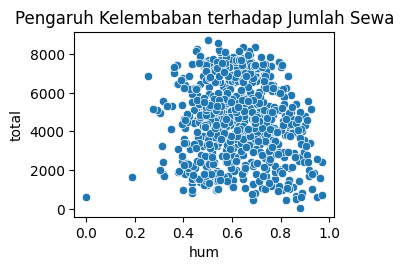

In [33]:
#  Pengaruh Kelembaban terhadap Jumlah Sewa
plt.subplot(2, 2, 4)
sns.scatterplot(x='hum', y='total', data=day)
plt.title('Pengaruh Kelembaban terhadap Jumlah Sewa')

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana perkembangan bisnis sewa sepeda dari tahun 2011 ke tahun 2012? apakah mengalami perkembangan atau penurunan.

     yr    total
0  2011  1243103
1  2012  2049576


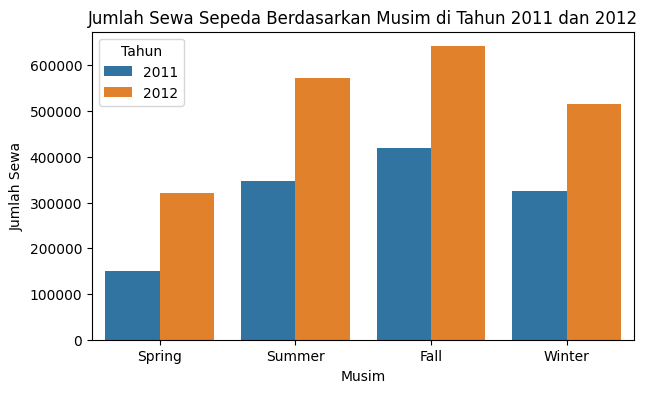

In [57]:
#Visualisasi jumlah sewa sepeda pada tahun 2011 dan 2012

day['total'] = day['casual'] + day['registered']
day['yr_season'] = day['yr'].astype(str) + '_season_' + day['season'].astype(str)
yr_season_stats = day.groupby('yr_season')['total'].sum().reset_index()
yr_season_stats[['yr', 'season']] = yr_season_stats['yr_season'].str.split('_season_', expand=True)
yr_season_stats['yr'] = yr_season_stats['yr'].map({'0': '2011', '1': '2012'})
yr_season_stats['season'] = yr_season_stats['season'].map({'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'})
colors = ['#1f77b4', '#ff7f0e']

# Total sewa berdasarkan tahun
yearly_stats = day.groupby('yr')['total'].sum().reset_index()
yearly_stats['yr'] = yearly_stats['yr'].map({0: '2011', 1: '2012'})
print(yearly_stats)

plt.figure(figsize=(7, 4))
sns.barplot(x='season', y='total', hue='yr', data=yr_season_stats, palette=colors)
plt.title('Jumlah Sewa Sepeda Berdasarkan Musim di Tahun 2011 dan 2012')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.legend(title='Tahun')
plt.show()

Diketahui bahwa, pada tahun 2012, terlihat mendapat lebih banyak penyewaan di bandingkan dengan tahun 2011. Ini adalah suatu perkembangan yang baik dalam bisnis bike sharing.

### Pertanyaan 2: Pada musim apa jumlah sewa paling banyak, dan bagaimana distribusi sewa berdasarkan jenis pengguna (casual vs registered) di setiap musim?

   season    total
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


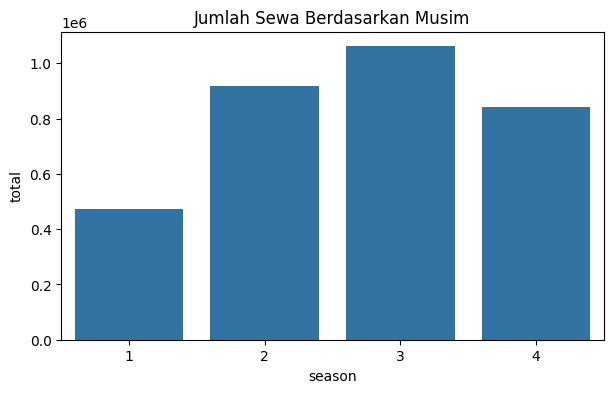

In [58]:
#  Total Sewa Berdasarkan Musim
day['total'] = day['casual'] + day['registered']
season_stats = day.groupby('season')['total'].sum().reset_index()
print(season_stats)

plt.figure(figsize=(7, 4))
sns.barplot(x='season', y='total', data=season_stats)
plt.title('Jumlah Sewa Berdasarkan Musim')
plt.show()

   season  casual  registered
0       1   60622      410726
1       2  203522      715067
2       3  226091      835038
3       4  129782      711831


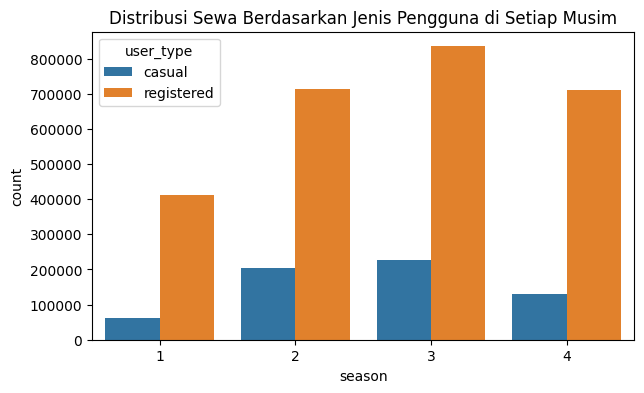

In [59]:
# Distribusi sewa berdasarkan jenis pengguna di setiap musim
season_user_stats = day.groupby(['season'])[['casual', 'registered']].sum().reset_index()
print(season_user_stats)

# Visualisasi
plt.figure(figsize=(7, 4))
season_user_stats_melted = season_user_stats.melt(id_vars=['season'], value_vars=['casual', 'registered'], var_name='user_type', value_name='count')
sns.barplot(x='season', y='count', hue='user_type', data=season_user_stats_melted)
plt.title('Distribusi Sewa Berdasarkan Jenis Pengguna di Setiap Musim')
plt.show()

1. Terlihat bahwa penyewaan sepeda pada musim 3 (musim fall) mendapatkan jumlah dengan penyewaan tertinggi dari 4 musim dengan total 1061129 total penyewaan pada tahun 2012.

2. Pada diagram distribusi jenis sewa berdasarkan musim, jenis yang registered rata-rata jauh lebih tinggi dibandingkan dengan casual di setiap musim.

3. Musim 1 (musim spring), terlihat mendpatkan jumlah penyewaan paling sedikit dibandingkan musim lainnya.

### Pertanyaan 3: Apakah suhu dan kecepatan angin berpengaruh terhadap jumlah sewa sepeda?

           temp     total
temp   1.000000  0.627494
total  0.627494  1.000000


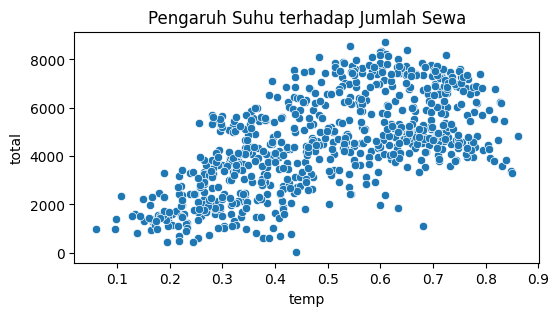

In [62]:
# Korelasi antara suhu dan total sewa
correlation_temp_total = day[['temp', 'total']].corr()
print(correlation_temp_total)
plt.figure(figsize=(6, 3))
sns.scatterplot(x='temp', y='total', data=day)
plt.title('Pengaruh Suhu terhadap Jumlah Sewa')
plt.show()

Cara membaca visualisasi

1. Jika titik-titik data cenderung membentuk pola naik, itu menunjukkan korelasi positif, yang berarti ketika suhu meningkat, jumlah sewa sepeda cenderung meningkat.

2. Jika titik-titik data cenderung membentuk pola turun, itu menunjukkan korelasi negatif, yang berarti ketika suhu meningkat, jumlah sewa sepeda cenderung turun.


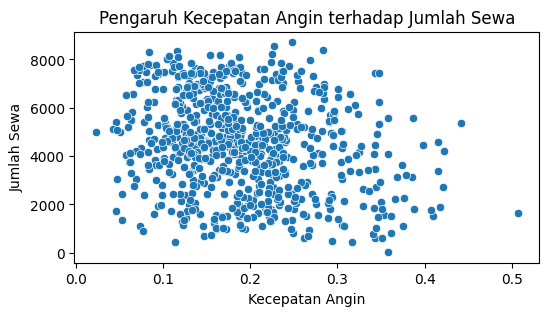

In [67]:
# Visualisasi pengaruh kecepatan angin terhadap jumlah sewa
plt.figure(figsize=(6, 3))
sns.scatterplot(x='windspeed', y='total', data=day)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Sewa')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sewa')
plt.show()

Cara membaca visualisasi

1.Sumbu X (Kecepatan Angin): Sumbu horizontal menunjukkan nilai kecepatan angin. Semakin ke kanan, semakin tinggi kecepatan anginnya.

2.Sumbu Y (Jumlah Sewa): Sumbu vertikal menunjukkan jumlah sewa sepeda. Semakin tinggi di sumbu ini, semakin banyak sepeda yang disewa.

3.Titik Data: Setiap titik pada diagram merupakan satu pengamatan yang mewakili nilai kecepatan angin dan jumlah sewa pada saat tertentu. Jika titik berada lebih tinggi di sumbu Y, itu berarti pada tingkat kecepatan angin tersebut, jumlah sewa sepeda lebih tinggi. Sebaliknya, jika titik berada lebih rendah di sumbu Y, jumlah sewa sepeda lebih rendah pada tingkat kecepatan angin tersebut.

## Conclusion

- Terjadi peningkatan jumlah minat sewa sepeda dari tahun 2011 ke tahun 2012. Menunjukan bisnis sewa sepeda mendapatkan hasil yang positif dengan perkembangan ini, sehingga bisnis sewa sepeda bisa terus dijalankan seterusnya.
- Musim gugur mendapati musim paling diminati oleh penyewa sepeda, dikarenakan musim ini sangat baik untuk bersepeda. Ini bisa dimanfaatkan dengan menaikan tarif sewa sepeda di musim semi sehingga bisa menemukaan harga pas antara suppy dan demand. Antara penyewa sepeda yang banyak dengan penyedia sepeda di musim gugur ini.
- Setelah di analisis kita mendapatkan kesimpulan bahwa pengaruh suhu terhadap jumlah penyewa sepeda sangat berpengaruh, yang dimana terlihat pada visualisasi bahwa saat suhu meningkat maka jumlah sewa sepeda cenderung mengalami kenaikan. Ini dikarekan dataset penyewaan sepeda ini diambil dari Negara yang memiliki 4 musim iklim, sehingga orang-orang cenderun lebih ingin bersepada di saat suhu stabil atau hangat. Kemudian pengaruh kecepatan angin juga berpengaruh terhadap jumlah sewa sepeda, yang dimana semakin kencang kecepatan angin maka semakin sedikit peminat untuk sewa sepeda.